# Imports

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


# Read Data

       This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.           In particular, the Cleveland database is the only one that has been used by ML researchers to this date.
    
* age - age in years<br>
* sex - (1 = male; 0 = female)<br>
* cp - chest pain type <br>
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) <br>
* chol - serum cholestoral in mg/dl <br>
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
* restecg - resting electrocardiographic results <br>
* thalach - maximum heart rate achieved <br>
* exang - exercise induced angina (1 = yes; 0 = no) <br>
* oldpeak - ST depression induced by exercise relative to rest <br>
* slope - the slope of the peak exercise ST segment <br>
* ca - number of major vessels (0-3) colored by flourosopy <br>
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect <br>
* target - have disease or not (1=yes, 0=no)

In [6]:
df = pd.read_csv("car-sales-extended.csv")
df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


# Data Exploration

### Sold cars door numbers

In [14]:
df.Doors.value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

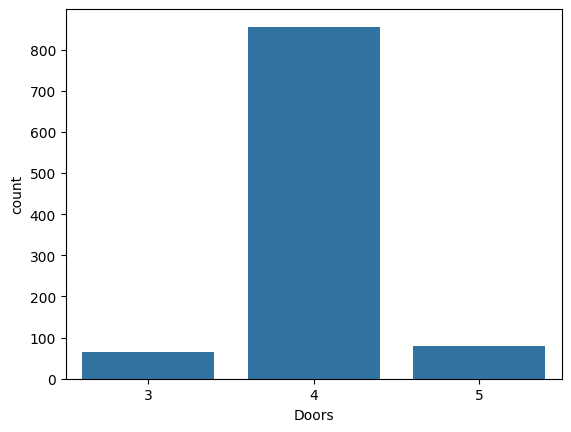

In [15]:
sns.countplot(x="Doors", data=df)
plt.show()

In [17]:
totalSales = len(df)
percentThreeDoors = len(df[df.Doors == 3]) / totalSales * 100
percentFourDoors = len(df[df.Doors == 4]) / totalSales * 100
percentFiveDoors = len(df[df.Doors == 5]) / totalSales * 100

print("Percentage of cars with 3 cars: {:.2f}%".format(percentThreeDoors))
print("Percentage of cars with 4 cars: {:.2f}%".format(percentFourDoors))
print("Percentage of cars with 5 cars: {:.2f}%".format(percentFiveDoors))

Percentage of cars with 3 cars: 6.50%
Percentage of cars with 4 cars: 85.60%
Percentage of cars with 5 cars: 7.90%


### Make distribution and correlation to doors

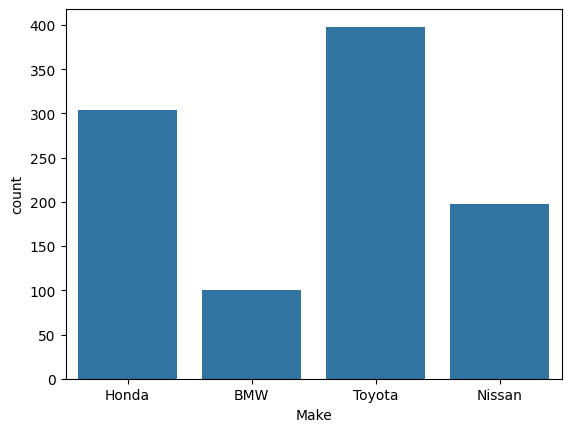

Percentage of Honda cars: 30.40%
Percentage of BMW cars: 10.00%
Percentage of Toyota cars: 39.80%
Percentage of Nissan cars: 19.80%


In [23]:
sns.countplot(x='Make', data=df)
plt.xlabel("Make")
plt.show()

hondaCars = len(df[df.Make == "Honda"])
bmwCars = len(df[df.Make == "BMW"])
toyotaCars = len(df[df.Make == "Toyota"])
nissanCars = len(df[df.Make == "Nissan"])
print("Percentage of Honda cars: {:.2f}%".format((hondaCars / totalSales)*100))
print("Percentage of BMW cars: {:.2f}%".format((bmwCars / totalSales)*100))
print("Percentage of Toyota cars: {:.2f}%".format((toyotaCars / totalSales)*100))
print("Percentage of Nissan cars: {:.2f}%".format((nissanCars / totalSales)*100))

/tmp/ipykernel_3402/117717215.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bmwWithThreeDoors = makeDoorsCrosstab[3][bmwIndex]
/tmp/ipykernel_3402/117717215.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bmwWithFourDoors = makeDoorsCrosstab[4][bmwIndex]
/tmp/ipykernel_3402/117717215.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bmwWithFoveDoors = makeDoorsCrosstab[5][bmwIndex]
/tmp/ipykernel_3402/117717215.py:10: Fu

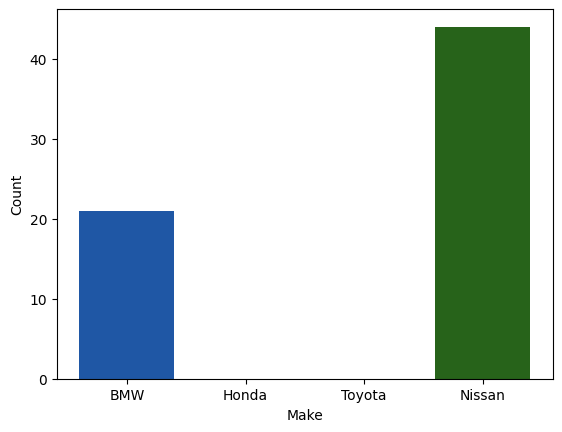

Number of BMWs with three doors: 21
Number of Hondas with three doors: 0
Number of Nissans with three doors: 44
Number of Toyotas with three doors: 0


In [42]:

makeDoorsCrosstab = pd.crosstab(df.Make, df.Doors)

bmwIndex = 0
hondaIndex = 1
nissanIndex = 2
toyotaIndex = 3
bmwWithThreeDoors = makeDoorsCrosstab[3][bmwIndex]
bmwWithFourDoors = makeDoorsCrosstab[4][bmwIndex]
bmwWithFoveDoors = makeDoorsCrosstab[5][bmwIndex]
hondaWithThreeDoors = makeDoorsCrosstab[3][hondaIndex]
hondaWithFourDoors = makeDoorsCrosstab[4][hondaIndex]
hondaWithFoveDoors = makeDoorsCrosstab[5][hondaIndex]
nissanWithThreeDoors = makeDoorsCrosstab[3][nissanIndex]
nissanWithFourDoors = makeDoorsCrosstab[4][nissanIndex]
nissanWithFoveDoors = makeDoorsCrosstab[5][nissanIndex]
toyotaWithThreeDoors = makeDoorsCrosstab[3][toyotaIndex]
toyotaWithFourDoors = makeDoorsCrosstab[4][toyotaIndex]
toyotaWithFoveDoors = makeDoorsCrosstab[5][toyotaIndex]

carsWithThreeDoors = [bmwWithThreeDoors, hondaWithThreeDoors, toyotaWithThreeDoors, nissanWithThreeDoors]
bars = ('BMW', 'Honda', 'Toyota', 'Nissan')
y_pos = np.arange(len(bars))

plt.bar(y_pos, carsWithThreeDoors, color=['#1f57a5', '#e7631a', '#e76323', '#27631a'])
plt.xlabel("Make")
plt.ylabel("Count")
plt.xticks(y_pos, bars)
plt.show()

print("Number of BMWs with three doors: {:d}".format(bmwWithThreeDoors))
print("Number of Hondas with three doors: {:d}".format(hondaWithThreeDoors))
print("Number of Nissans with three doors: {:d}".format(nissanWithThreeDoors))
print("Number of Toyotas with three doors: {:d}".format(toyotaWithThreeDoors))

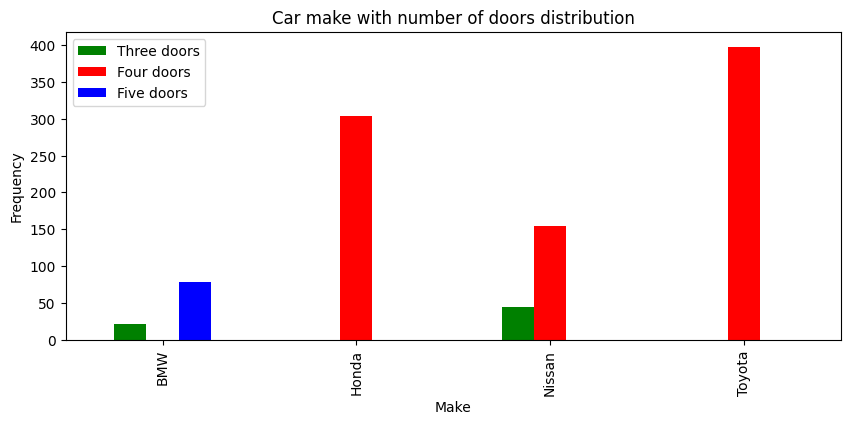

In [43]:
makeDoorsCrosstab.plot(kind="bar",figsize=(10,4),color=['green','red', 'blue', 'yellow'])
plt.title('Car make with number of doors distribution')
plt.xlabel('Make')
plt.legend(["Three doors", "Four doors", "Five doors"])
plt.ylabel('Frequency')
plt.show()

### Colour correlation to door numbers

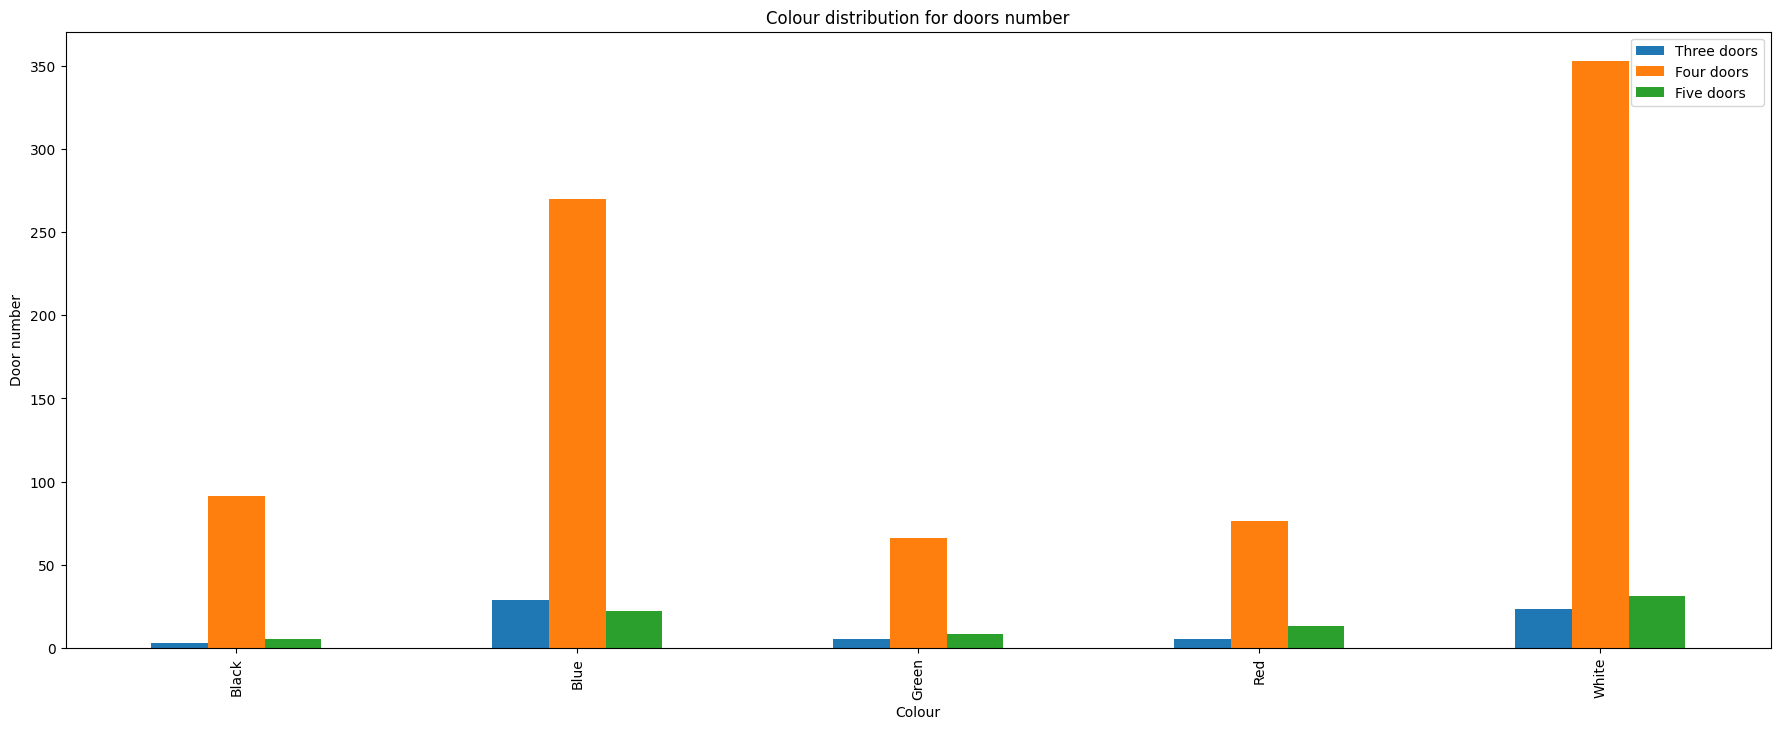

In [45]:
pd.crosstab(df.Colour,df.Doors).plot(kind="bar",figsize=(22,8))
plt.title('Colour distribution for doors number')
plt.xlabel('Colour')
plt.ylabel('Door number')
plt.legend(["Three doors", "Four doors", "Five doors"])
plt.show()

### Heart rate and age corelation to disease

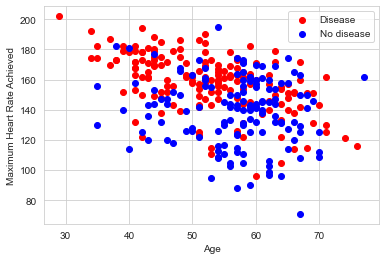

In [516]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c="blue")
plt.legend(["Disease", "No disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate Achieved")
plt.show()

### Heart disease frenquency for slope

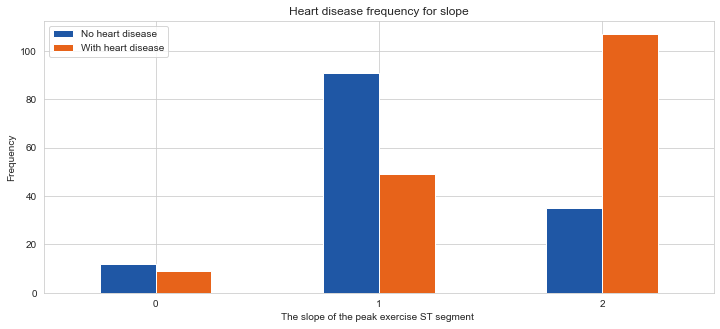

In [517]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(12,5),color=['#1f57a5', '#e7631a'])
plt.title('Heart disease frequency for slope')
plt.xlabel('The slope of the peak exercise ST segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.legend(["No heart disease", "With heart disease"])
plt.show()

### Heart disease frenquency for FBS

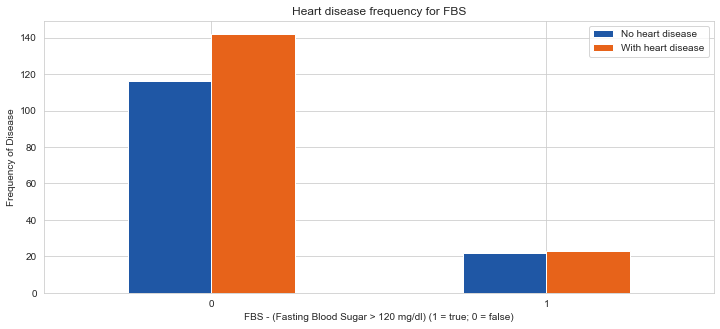

In [518]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(12,5),color=['#1f57a5', '#e7631a'])
plt.title('Heart disease frequency for FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["No heart disease", "With heart disease"])
plt.ylabel('Frequency of Disease')
plt.show()

### Heart disease frenquency for chest pain types

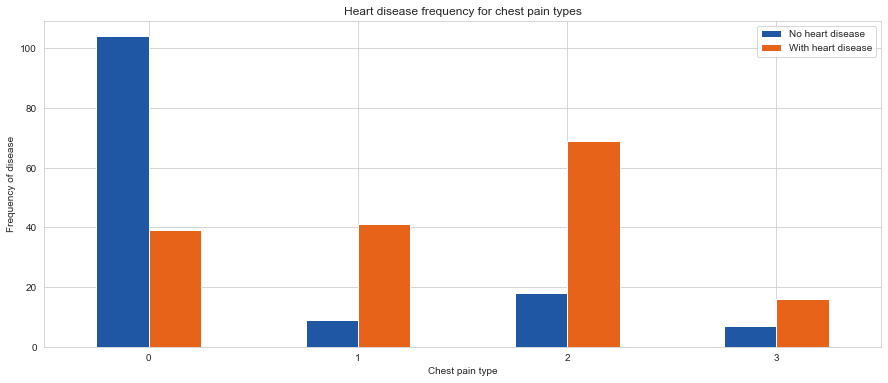

In [519]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#1f57a5', '#e7631a'])
plt.title('Heart disease frequency for chest pain types')
plt.xlabel('Chest pain type')
plt.xticks(rotation = 0)
plt.legend(["No heart disease", "With heart disease"])
plt.ylabel('Frequency of disease')
plt.show()

### Saving variables

#### Since 'cp', 'thal' and 'slope' are categorical variables we first turn them into dummy variables. After turning them to dummies, we drop the above mentioned columns.
#### https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [520]:
auxCp    = pd.get_dummies(df['cp']   , prefix = "cp")
auxThal  = pd.get_dummies(df['thal'] , prefix = "thal")
auxSlope = pd.get_dummies(df['slope'], prefix = "slope")

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [521]:
frames = [df, auxCp, auxThal, auxSlope]
df = pd.concat(frames, axis = 1)
df = df.drop(columns = ['cp', 'thal', 'slope'])

df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1
